The goal is to train a neural network in order to forecast crypto prices, we select crypto currencies that are mostly traded and not predominantly used in DeFi for liquidity, pool strapping etc... We focus on the main ones, the digital assets that considered mainstream and that are actively traded on the spot & futures market while being relied on for transactions' settlments and value transfers/crossborders payments: BTC, ETH, XMR, DGB, LTC, DASH, XLM(STELLAR), along with the so called meme-coins like DOGECOIN & SHIBA that a few online and main street retailers, restaurants adopted as mean of crypto payments.

Sources:
https://smallbiztrends.com/2021/12/who-accepts-bitcoin.html#:~:text=Paypal,Cash%2C%20Litecoin%2C%20or%20Ethereum.
https://www.euronews.com/next/2021/12/04/paying-with-cryptocurrencies-these-are-the-major-companies-that-accept-cryptos-as-payment
https://smallbiztrends.com/2021/12/who-accepts-bitcoin.html#:~:text=Paypal,Cash%2C%20Litecoin%2C%20or%20Ethereum.
https://www.gobankingrates.com/money/business/10-major-companies-that-accept-bitcoin/


Time series regression relies on the past to make prediction about future, it is basically using past values to predict future time-series values.
1/The model receives inputs as data in batches, each batch contains time series of past value ranging in a time period.
2/The number of values a neural network can predict depends on the number of NEURONS in the output layer.
3/Neural networks relies on nodes layers for the purpose of trying to simulate the behavior of the human brain which is to recognize patterns by facing the data by training the model with the data introduced through the nodes in the input layer then through the multiple hidden layer, which allows the model to detect patterns over time thanks to the repetition and high velocity of the model training which offers an increase in accuracy.

In [2]:
#Importing libraries & dependencies 
import math
import numpy as np
import pandas as pd

from datetime import date, timedelta, datetime
from pandas.plotting import register_matplotlib_converters

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import seaborn as sns

In [35]:
#Setting the timeframe for data extraction
today = date.today()
date_today = today.strftime("%Y-%m-%d")
date_start = '2014-01-01'

crypto = "BTC"
symbol = "BTC-USD"

In [64]:
import yfinance as yf
# data = yf.download(symbol, start = date_start, end = date_today)

ticker = yf.Ticker("BTC-USD")
crypto_data = ticker.history(start="2021-01-01", end= date_today, interval= "60m")

#Calculation of the hourly delta , High minus Low
delta = crypto_data["High"]-crypto_data["Low"]
crypto_data["Delta"]=delta

delta_open_close = crypto_data["Open"]-crypto_data["Close"]
crypto_data["Delta Hr Trend"] = delta_open_close
#Renaming Columns for more clarity
crypto_data.rename(columns={"Open":"Open Price","Close":"Close Price"}, inplace = True)

#Dropping useless columns
crypto_data.drop(["High", "Low",'Dividends',"Volume","Stock Splits"], axis = 1, inplace= True)

#Quick overview of the dataset
crypto_data.head()

,Open Price,Close Price,Delta,Delta Hr Trend
Datetime,,,,
2021-01-01 05:00:00+00:00,29251.222656,29198.923828,91.457031,52.298828
2021-01-01 06:00:00+00:00,29198.158203,29170.220703,115.632812,27.937500
2021-01-01 07:00:00+00:00,29171.677734,29131.013672,221.914062,40.664062
2021-01-01 08:00:00+00:00,29129.400391,29087.369141,201.083984,42.031250
2021-01-01 09:00:00+00:00,29079.804688,29233.941406,261.933594,-154.136719


In [65]:
#Given the random nature of price variations we expect some negative Delta Hr Trend values 
#Verification of negative values existences
(crypto_data < 0).any().any()

True

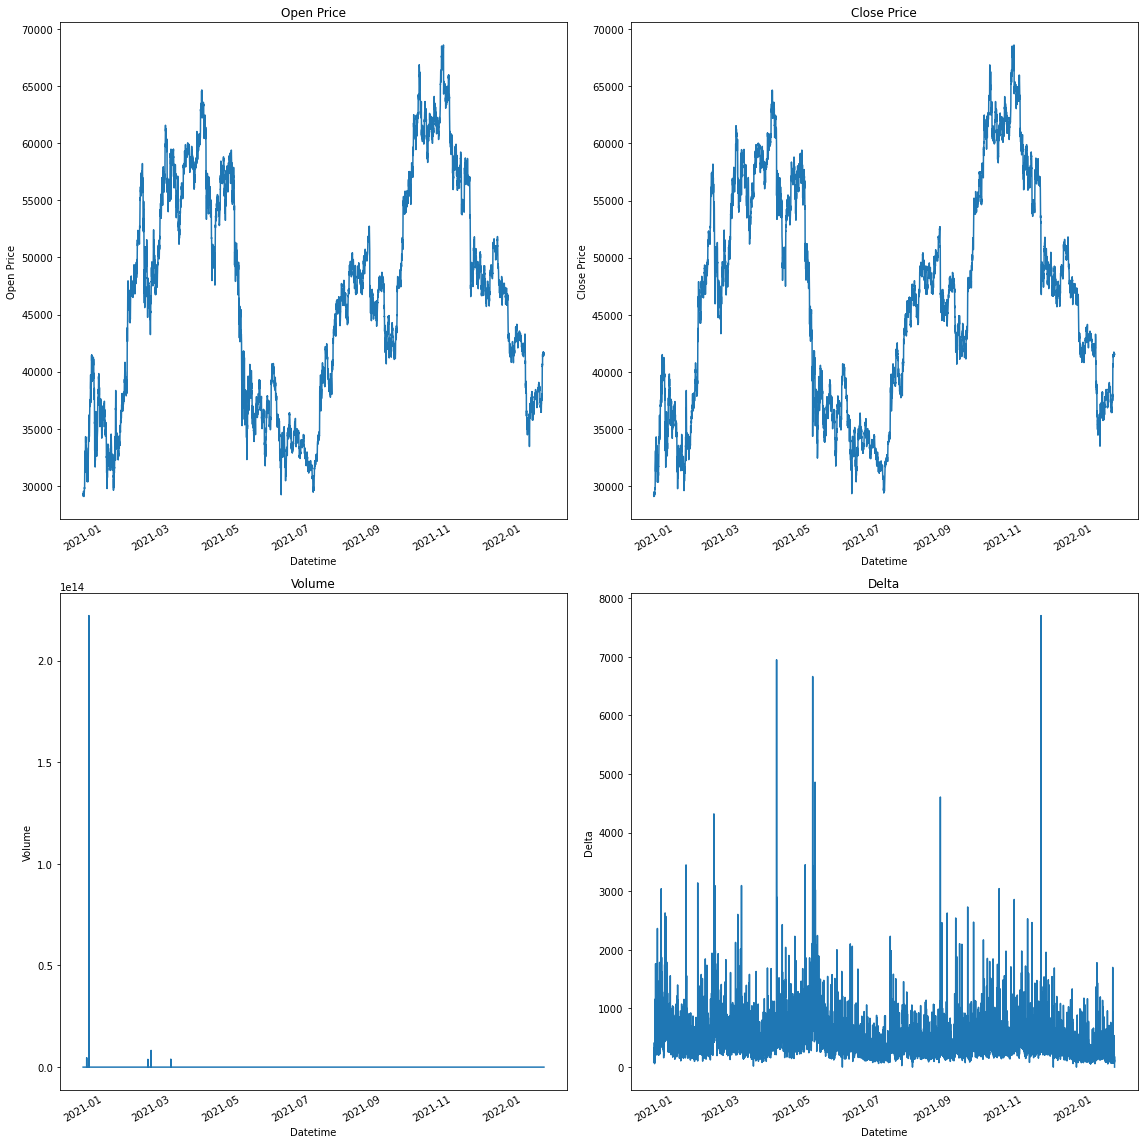

In [58]:
df_plot = crypto_data.copy()

list_length = df_plot.shape[1]
ncols = 2
nrows = int(round(list_length/ ncols, 0))

fig, ax = plt.subplots(nrows = nrows, ncols = ncols, sharex = True, figsize=(16,16))
fig.subplots_adjust(hspace = 0.5, wspace =0.5)
for i in range(0, list_length):
    ax = plt.subplot(nrows, ncols, i+1)
    sns.lineplot(data = df_plot.iloc[:, i], ax = ax)
    ax.set_title(df_plot.columns[i])
    ax.tick_params(axis="x", rotation=30,labelsize=10, length=0)
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()